In [1]:
import networkx as nx
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open("data/cleaned/sub", 'rb') as f:
    sub = pickle.load(f)
with open("data/cleaned/comm", 'rb') as f:
    comm = pickle.load(f)

    
diff_sub = data.groupby(['subreddit']).agg(num_of_diff = ('subreddit' , 'nunique'))
print(diff_sub)
    
data = pd.concat([comm[['author', 'subreddit_id', 'subreddit']], sub[['author', 'subreddit_id', 'subreddit']]], ignore_index=True)
print(sub.shape)
print(comm.shape)
print(data.shape)
data


            id                                                url  \
0        648oo  http://www.ignorancedenied.com/viewthread.php?...   
1        648op                http://www.flascience.org/wp/?p=363   
3        648or  http://hosted.ap.org/dynamic/stories/O/ODD_SHO...   
4        648os  http://www.sltrib.com/opinion/ci_7846101?sourc...   
5        648ot  http://hosted.ap.org/dynamic/stories/O/ODD_RAR...   
...        ...                                                ...   
2519844  7mq3n  http://ventaboutsports.blogspot.com/2008/12/so...   
2519845  7mq3o      http://www.pbs.org/mormons/etc/genealogy.html   
2519847  7mq3q                         http://www.narutogames.biz   
2519848  7mq3r  http://www.youtube.com/watch?v=gdQH1CI4LHY&amp...   
2519852  7mq3v  http://player.video.news.com.au/dailytelegraph...   

                                                 permalink           author  \
0        /r/reddit.com/comments/648oo/brain_disease_is_...            DITUS   
1        /r/s

,author,subreddit_id,subreddit
0,Haven,t5_6,reddit.com
1,lilmiss2,t5_6,reddit.com
2,EverybodysAnAsshole,t5_6,reddit.com
3,generalk,t5_2fwo,programming
4,seeker135,t5_2cneq,politics
...,...,...,...
6918495,themightymidget,t5_2qh33,funny
6918496,Tom22,t5_2qh3l,news
6918497,bixiebix,t5_6,reddit.com
6918498,middkidd,t5_2cneq,politics


In [3]:
diff_sub = data.groupby(['subreddit']).agg(num_of_diff = ('subreddit' , 'count'))
print(diff_sub)

                    num_of_diff
subreddit                      
10stepstohealth               2
1111111                       2
1337                          4
1_Irritated_Mother            2
1keral                        3
...                         ...
zoepster                      3
zombies                     335
zope                          5
zora                          6
zubii                         1

[4359 rows x 1 columns]


###  1.2) Broj korisnika





In [93]:
data_g = data.groupby(['subreddit_id', 'subreddit']).nunique().sort_values(by= ['author'], ascending = False)
print(data_g.head(10))

                            author
subreddit_id subreddit            
t5_6         reddit.com     163779
t5_2cneq     politics        38374
t5_2qh0u     pics            29753
t5_2qh16     technology      28337
t5_2qh33     funny           28186
t5_2qh0f     entertainment   26360
t5_mouw      science         25854
t5_2fwo      programming     25819
t5_2qgzg     business        25253
t5_2qh13     worldnews       24937


### 1.3) Broj Komentara

In [94]:
data_comm = comm
data_comm
data_comm_g = data_comm.groupby(['subreddit' , 'subreddit_id']).agg(counts=('id' , 'count')).nlargest(10, "counts")
print(data_comm_g.head(10))



                           counts
subreddit   subreddit_id         
reddit.com  t5_6          1143184
politics    t5_2cneq       801396
programming t5_2fwo        345997
pics        t5_2qh0u       286192
science     t5_mouw        238291
worldnews   t5_2qh13       228793
WTF         t5_2qh61       187876
funny       t5_2qh33       175547
technology  t5_2qh16       149803
AskReddit   t5_2qh1i       139760


### 2 Prosecan broj korisnika

In [133]:
users_g = data.groupby(['subreddit', 'subreddit_id']).agg(numUsers= ('author', 'nunique'))['numUsers'].sum()
list_sub = set(sub['subreddit_id'].unique())
list_comm = set(comm['subreddit_id'].unique())

set_of_subreddits = list_sub.union(list_comm)

print("Prosecan broj usera :" , users_g / len(set_of_subreddits))

Prosecan broj usera : 148.63142201834862


### 3 - Najveci broj objava

In [111]:
data_sub = sub
print(data_sub.columns)
data_sub_g = data_sub.groupby('author').agg(counts = ('id' , 'count')).nlargest(5, 'counts')
data_sub_g

Index(['id', 'url', 'permalink', 'author', 'created_utc', 'subreddit',
       'subreddit_id', 'num_comments'],
      dtype='object')


,counts
author,
gst,18870
qgyh2,12238
rmuser,9822
twolf1,8597
IAmperfectlyCalm,8308


### 3.2 - Najveci broj komentara


In [112]:
data_comm = comm
print(data_comm.columns)
data_comm_g = data_comm.groupby('author').agg(counts = ('id' , 'count')).nlargest(5, 'counts')
data_comm_g

Index(['id', 'author', 'link_id', 'parent_id', 'subreddit', 'subreddit_id'], dtype='object')


,counts
author,
NoMoreNicksLeft,13480
malcontent,12159
matts2,11672
mexicodoug,9169
7oby,9161


### 4 - Najveci broj subredita


In [113]:
data_g = data.groupby('author').agg(num_activity = ('subreddit_id', 'nunique')).nlargest(5, 'num_activity')
data_g

,num_activity
author,
MrKlaatu,181
Escafane,154
omfgninja,122
codepoet,111
scientologist2,111


### 5 - Kolerisani brojevi


                      num_sub
author                       
*polhold00133               8
*polhold00149               1
--------------------        1
-----KATHRINE               1
--semi--                    1
...                       ...
zzzxxc                      1
zzzz2008                   16
zzzz71                      1
zzzzzzzzzzz                 2
zzzzzzzzzzzzzzzzzzz         1

[185351 rows x 1 columns]
0.14608000759906184
0.0


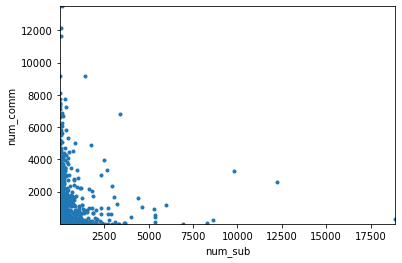

In [5]:
import scipy.stats as stats
sub_grouped = sub.groupby('author').agg(num_sub = ('id' , 'count'))
print(sub_grouped)
comm_grouped = comm.groupby('author').agg(num_comm = ('id' , 'count'))
together = pd.concat([sub_grouped , comm_grouped] , axis = 1).fillna(0)

cc, p = stats.pearsonr(together['num_sub'], together['num_comm'])

print(cc)
print(p)

def plot_deg_corr(x , y, xscale = "linear", yscale = "linear"):
    

    plt.figure(1)   

    plt.xlabel('num_sub')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x)) 

    plt.ylabel('num_comm')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             

    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

plot_deg_corr(together['num_sub'], together['num_comm'])



### 6 - Over 18

In [6]:
data_sub = sub[sub['over_18'] !=True]
data_sub = data_sub.sort_values('num_comments', ascending=False) 
print(data_sub.nlargest(5, 'num_comments'))

            id                                                url  \
914332   6nz1k                          http://hundredpushups.com   
1871724  78n1v  http://www.time.com/time/nation/article/0,8599...   
135995   675oj  https://www.reddit.com/r/reddit.com/comments/6...   
1999653  7beo2  https://www.reddit.com/r/politics/comments/7be...   
1428657  6z2e2  http://www.nytimes.com/reuters/us/internationa...   

                                                 permalink        author  \
914332   /r/science/comments/6nz1k/got_six_weeks_try_th...         zekel   
1871724  /r/WTF/comments/78n1v/a_black_community_in_oh_...      indorock   
135995   /r/reddit.com/comments/675oj/post_the_funniest...   matiasklein   
1999653  /r/politics/comments/7beo2/obama_wins_the_pres...  willjohnston   
1428657  /r/reddit.com/comments/6z2e2/palin_says_her_da...   nucleophile   

         created_utc   subreddit subreddit_id  num_comments  over_18  
914332    1213826517     science      t5_mouw         333